# Apartamentos SP

Nesse projeto, vamos usar o modelo de regressão RandomForestRegressor para predizer o preço de apartamentos em São Paulo.     
Usaremos o scikit-learn para desenvolver o modelo, o scikit-learn é uma biblioteca python de aprendizado de máquina de código aberto muito usada por diversos profissionais.                   

O dataset usado foi obtido por meio do Kaggle, porém ele não está mais disponível.                                                                                                         
A análise desse dataset já foi feita por mim [aqui](https://bitbucket.org/joseestevan/overview/src/master/Apartamentos%20SP/).                                                             Por conta disso, irei pular a parte da análise exploratória e focar no modelo.

## Regressão 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from yellowbrick.features import Rank2D
from sklearn.model_selection import cross_val_predict, train_test_split
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('apartamentos_sp.csv')
df.copy = pd.get_dummies(df, columns=['neighborhood'], prefix=["neigh"])
X = df.copy.drop('final_price', axis=1)
y = df.copy['final_price']

#X = X.reshape(X.shape[1:])
#X = X.transpose()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('(X) Treino {}'.format(X_train.shape))

print('(X) Teste {}'.format(X_test.shape))
print('')
print('(Y) Treino {}'.format(y_train.shape))

print('(Y) Teste {}'.format(y_test.shape))

(X) Treino (12562, 685)
(X) Teste (3141, 685)

(Y) Treino (12562,)
(Y) Teste (3141,)


In [34]:
df.columns

Index(['neighborhood', 'square_meters', 'bedrooms', 'bathrooms', 'suites',
       'parking_spaces', 'final_price'],
      dtype='object')

### Predição e Comparação

In [26]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train) 
pred_train = model.predict(X_train)

In [27]:
comparacao = pd.DataFrame({'Real': y_train, 'Predição': pred_train})
comparacao

,Real,Predição
11427,2700.0,2702.040000
10370,234.0,264.127078
11319,690.0,702.615000
381,349.0,371.158714
15410,590.0,550.543333
...,...,...
13123,551.0,501.126667
3264,3000.0,3074.400000
9845,1840.0,1671.409280
10799,797.0,798.218880


### Métricas e Performance


Para este projeto, calcularemos o coeficiente de determinação, R2, para quantificar o desempenho do nosso modelo. O coeficiente de determinação de um modelo é uma estatística útil na análise de regressão, pois geralmente descreve o quão "bom" esse modelo é em fazer previsões.

Os valores de R2 variam de 0 a 1, que captura a porcentagem de correlação quadrada entre os valores previstos e reais da variável de destino. Um modelo com R2 de 0 não é melhor do que um modelo que sempre prevê a média da variável de destino, enquanto um modelo com R2 de 1 prediz perfeitamente a variável de destino. Qualquer valor entre 0 e 1 indica qual porcentagem da variável de destino.

In [47]:
pred_test = model.predict(X_test)
print('Coeficiente de Determinação:',round(r2_score(y_test, pred_test), 2))

Coeficiente de Determinação: 0.81


O modelo acima tem um coeficiente de determinação, R2, de 0,81. Considerando que o pior valor para o R2 é 0, e o melhor escore é 1, um escore de 0,81 significa que o modelo captura com sucesso mais de 80 por cento da variação na variável de destino. Embora seja importante notar que o quão boa é a pontuação, depende do domínio do problema.

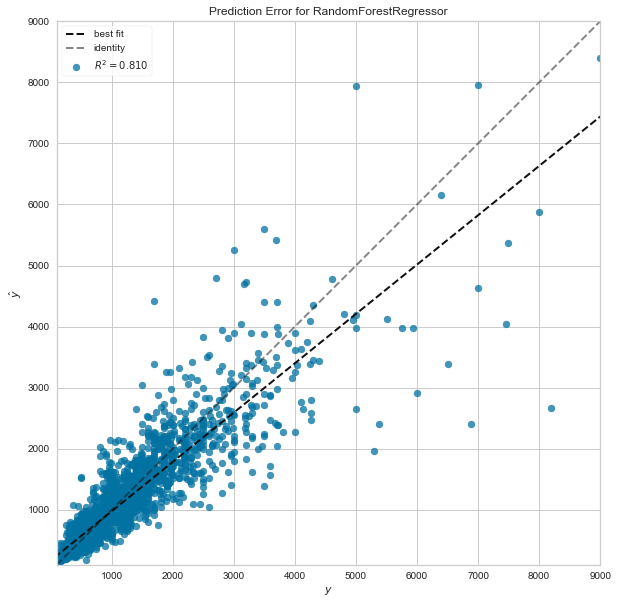

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [68]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)  

visualizer.show() 

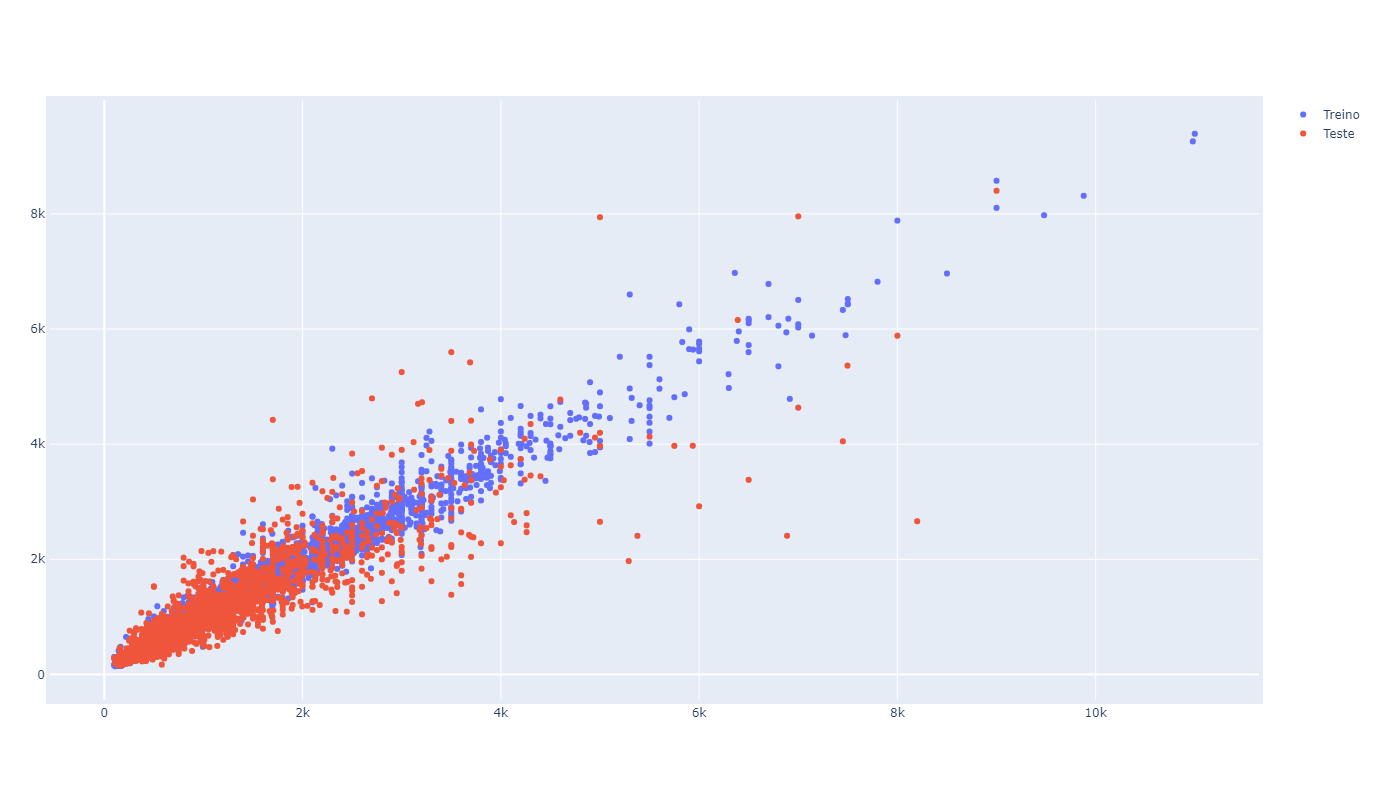

In [45]:
fig = go.Figure([
    go.Scatter(x=y_train.squeeze(), y=pred_train, name='Treino', mode='markers'),
    go.Scatter(x=y_test.squeeze(), y=pred_test, name='Teste', mode='markers')
])
fig.update_layout(
    autosize=False,
    width=1350,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show()

### Correlação

<AxesSubplot:>

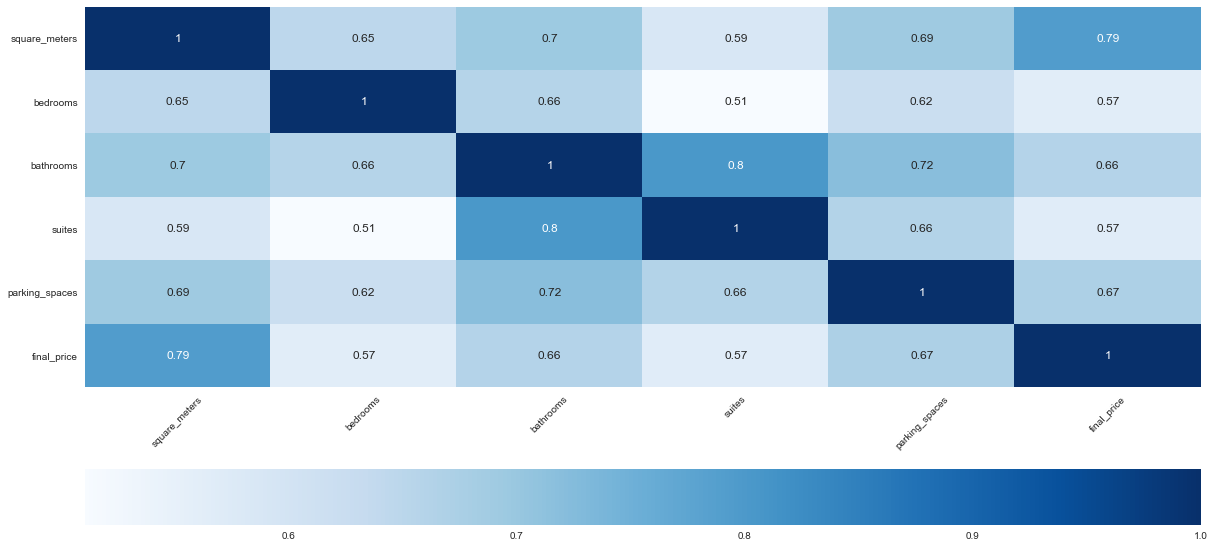

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45)
plt.yticks(rotation=180)
sns.heatmap(df.corr(), cmap="Blues", annot=True, cbar_kws={"orientation": "horizontal"})

## Conclusão

Construímos um modelo de regressão que performa razoavelmente bem usando todas as features do dataset.                                                                                         
Analisando o gráfico e o dataset, podemos perceber que os outliers fazem com que o modelo não tenha um desempenho tão bom.                                                        
Em questão de performance ele se saiu bem para um modelo simples, junto de um conjunto de dados bem limitado e que não foi tratado. 